# **TP N°1 : Perceptron mono-couche**

## **Partie I**
## DataSet

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

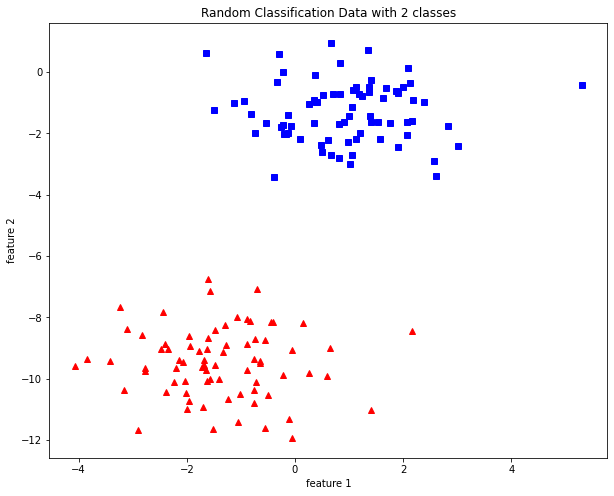

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_blobs (n_samples=150, n_features=2,centers=2, cluster_std=1.05,random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')


## Implémentation


1.   Coder la fonction d’activation de Heavisid




In [ ]:
def acti_func(z):
  if z > 0: 
    return 1
  else: 
    return 0


2.
Implementer l’algorithme de perceptron



In [ ]:
import numpy as np
def perceptron(X, y, lr, epochs):
 # X --> Inputs.
 # y --> labels/target.
 # lr --> learning rate.
 # epochs --> Number of iterations.
 # m-> number of training examples
 # n-> number of features 
 m, n = X.shape
 # Initializing parameters(theta) to zeros.
 # +1 in n+1 for the bias term.
 w = np.zeros((n+1,1))
 # Empty list to store how many examples were 
 # misclassified at every iteration.
 n_miss_list = []
 # Training.
 for epoch in range(epochs):
 # variable to store #misclassified.
  n_miss = 0
 # looping for every example.
  for idx, x_i in enumerate(X):
# Insering 1 for bias, X0 = 1.
    x_i = np.insert(x_i, 0, 1).reshape(-1,1)
 # Calculating prediction/hypothesis.
    y_hat = acti_func(np.dot(x_i.T, w))
 # Updating if the example is misclassified.
    if (np.squeeze(y_hat) - y[idx]) != 0:
      w= w + lr * (y[idx] - y_hat) * x_i
 # Incrementing by 1.
      n_miss += 1
 # Appending number of misclassified examples
 # at every iteration.
  n_miss_list.append(n_miss)
 return w, n_miss_list

In [ ]:
w, miss = perceptron(X, y, 0.1, 10)
print(miss)

[14, 0, 0, 0, 0, 0, 0, 0, 0, 0]



3. Tracez la limite de décision trouvée par votre algorithme.


In [ ]:
import matplotlib.pyplot as plt 
def plot_decision_boundary(X, w):
 
 # X --> Inputs
 # w --> parameters


 # The Line is y=mx+c
 # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
 # Solving we find m and c
 #w0*1 + w1*x1 + w2 * x2 = 0 et x2 = m * x1 + c => on écrit x2 en fn de x1
 x1 = [min(X[:,0]), max(X[:,0])]
 m = -w[1]/w[2]
 c = -w[0]/w[2]
 x2 = m*x1 + c
 
 # Plotting
 fig = plt.figure(figsize=(10,8))
 plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
 plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
 plt.plot(x1, x2)
 plt.xlabel("feature 1")
 plt.ylabel("feature 2")
 plt.title('Random Classification Data with 2 classes')

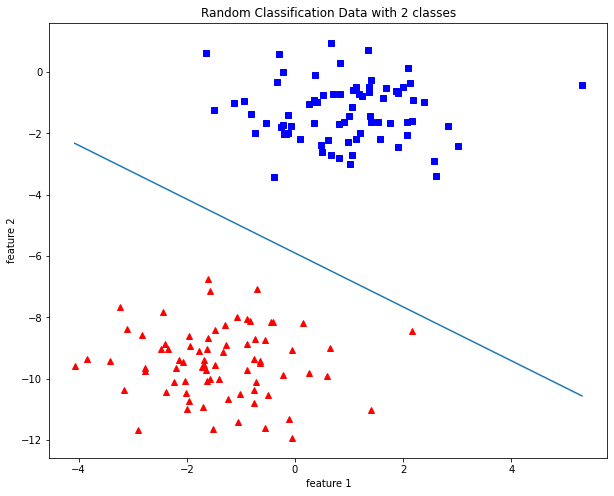

In [ ]:
 plot_decision_boundary(X, w)

### **Partie II**

### Generation des données

In [ ]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

def generate_dataset(sigma):
  #création de 125 exemples classés -1 et générés selon 𝜇1 = [-1, 0]
  x1, y1= sklearn.datasets.make_gaussian_quantiles(mean=[-1, 0], cov=sigma, n_samples=125, n_features=2, n_classes=1)
  y1 = -np.ones(shape=(125,))

  #création de 125 exemples classés 0 et générés selon 𝜇2 = [1, 0]
  x2, y2 = sklearn.datasets.make_gaussian_quantiles(mean=[1, 0], cov=sigma, n_samples=125, n_features=2, n_classes=1)
  y2 = np.zeros(shape=(125,))

  #concaténation des deux sets
  X = np.concatenate((x1,x2),axis=0)
  Y = np.concatenate((y1,y2),axis=0)

  #mélange de la dataset et création de train sets et test sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, shuffle=True)
  return X_train, X_test, y_train, y_test


In [ ]:
import matplotlib.pyplot as plt 
def plot_decision_boundary(X, y, w):
  plt.figure()
  y = y.reshape(-1,)
  plt.scatter(X[y == -1][:,0], X[y == -1][:, 1] , label='-1')
  plt.scatter(X[y == 0][:,0], X[y == 0][:, 1], label = '0')

  x_max = max(X[:,0].max(), -X[:,0].min()) 
  y_max = max(X[:,1].max(), -X[:,1].min())
    
  x_boundary = np.linspace(-x_max, x_max, 1000)
  y_boundary = -1 * w[0] / w[1] * x_boundary
    
    
  plt.plot(
      x_boundary[(y_boundary <= y_max) & (y_boundary >= -y_max)],
      y_boundary[(y_boundary <= y_max) & (y_boundary >= -y_max)],
      label = 'decision boundary'
    )
  plt.legend()


### Définition de la fonction pour faire une expérience

In [ ]:
def experience (sigma, epochs):
  X_train, X_test, y_train, y_test = generate_dataset(sigma)
  w, missed = perceptron(X_train, y_train, 0.1, epochs)
  print("W=", w, "missed values =", missed, "\n")
  plot_decision_boundary(X_train, y_train, w)
  w, missed = perceptron(X_train, y_train, 0.1, epochs)

  return X_test, y_test, w


### Définition de la fonction de prédiction pour le test set et calcul de l'accuracy

In [ ]:
from sklearn.metrics import accuracy_score
def predict(x, y, w):
    y_pred = np.dot(x,w)
    y_class = np.zeros_like(y_pred)
    y_class[y_pred <= 0] = -1

    acc = accuracy_score(y, y_class)
    
    return y_class, acc

### **Expérience 1 :**

W= [[-1171.2       ]
 [  746.25980814]
 [  -25.72165616]] missed values = [119, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117, 117, 117, 117, 117, 118, 117, 117, 117, 117] 



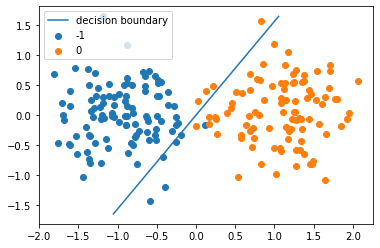

In [ ]:
#sigma²=0.25
X_test, y_test, w = experience(0.25, 100)



1.  Le taux d'erreur ne diminue pas donc l'algorithme ne converge pas.Ceci est dû au nombre limité des itérations.
2.   Calculer la justesse (accuracy) de la classification sur l'ensemble de test. 







Prediction on test set: 

L'accuracy =  0.92


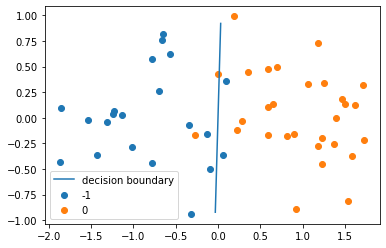

In [ ]:
#Prédiction sur le test set et calcul d'accuracy 
w = w[1:]
print("Prediction on test set: \n")
y_class, accuracy = predict(X_test, y_test, w)
print("Accuracy = ", accuracy) 
plot_decision_boundary(X_test, y_test, w)

### **Expérience 2 :**

W= [[-1090.1       ]
 [  497.52203678]
 [    7.92396079]] missed values = [109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109] 



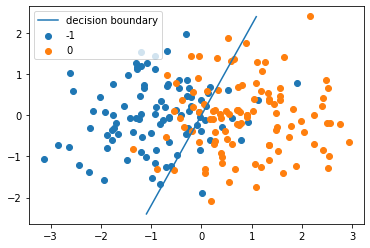

In [ ]:
#sigma²=0.75
X_test, y_test, w = experience(0.75, 100)



1.   L'algorithme ne converge pas pour les mèmes raisons que dans l'expérience 1
2.   Calculer la justesse (accuracy) de la classification sur l'ensemble de test. 







Prediction on test set: 

Accuracy =  0.9


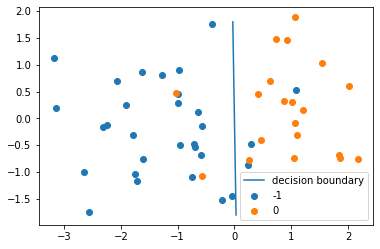

In [ ]:
#Prédiction sur le test set et calcul d'accuracy pour sigma²=0.75
w = w[1:]
print("Prediction on test set: \n")
y_class, accuracy = predict(X_test, y_test, w)
print("Accuracy = ", accuracy) 
plot_decision_boundary(X_test, y_test, w)

### **Expérience 2 :**

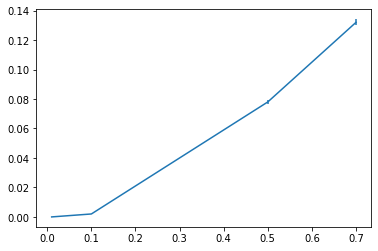

In [ ]:
sigma = [0.01, 0.1, 0.5, 0.7]

moy_errors = []
var_errors = []

for s in sigma:
  experience_errors = []
  errors = []

  for i in range(30):
    X_train, X_test, y_train, y_test = generate_dataset(s)
    #apprentissage du modèle et récupération des poids et des erreurs
    w, missed = perceptron(X_train, y_train, 0.1, 100)
    w=w[1:]
    #calcul de l'accuracy sur le test
    y_class, accuracy = predict(X_test, y_test, w)
    #calcul des erreurs pour la ième expérience
    errors = np.abs(y_test - y_class.reshape(-1,))
    #ajout de la moyenne des erreurs calculés lors de la ième expérience
    experience_errors.append(np.array(errors).mean()) 

  #calcul de la moyenne des erreurs pour chaque valeur de variance
  moy_errors.append(np.array(experience_errors).mean())  
  #calcul de la variance  des erreurs pour chaque valeur de variance
  var_errors.append(np.array(experience_errors).std()**2) 
  
plt.errorbar(sigma, moy_errors, var_errors)
plt.show()

Ce graphique présente la variation de l’erreur par rapport à sigma.
Plus les valeurs de sigma sont faibles plus l'erreur est faible (presque nulle) et vis versa. 
En effet sigma rprésente la variance de la distribution. Si elle augmente , il ya chevauchement entre les observations et par conséquent on peut pas les classer linéairement.
On conclut alors que l'algorithme de perceptron peut séparer les classes linéairement à condition que sigma soit < à 0.1. Dans le cas contarire l'algorithme diverge.